In [1]:
import pandas as pd

In [2]:
lfpr = pd.read_csv('LFPR_final.csv')
nfhs5 = pd.read_csv('merged_nfhs5_district_level.csv')
dom = pd.read_csv('nfhs5_female_dv_district_level_final.csv')

In [5]:
result = lfpr[['District', 'lfpr_percent']].merge(nfhs5[['district', 'state', 
                                                         'digital_gender_gap', 
                                                         'f_mean_age',
                                                         'f_mean_education',
                                                         'f_mean_yrs_edu',
                                                         'f_pct_literate',
                                                         'f_pct_sc',
                                                         'f_pct_st',
                                                         'f_pct_general',
                                                         'f_pct_obc',
                                                         'f_mean_wealth_scr',
                                                         'f_mean_wealth_idx',
                                                         'f_pct_urban',
                                                            'f_pct_rural',
                                                            'f_mean_hh_size',
                                                            'f_pct_married',
                                                            'f_pct_divorced',
                                                            'f_pct_has_mobile',
                                                            'f_pct_ever_breastfed_c1',
                                                            'f_n_respondents',




                                                         ]], on='district', how='left').to_csv('final.csv', index=False)

KeyError: 'district'

In [6]:
lfpr[['District', 'lfpr_percent']].rename(columns={'District': 'district'}).merge(nfhs5[['district', 'state', 'digital_gender_gap', 'f_mean_age', 'f_mean_education', 'f_mean_yrs_edu', 'f_pct_literate', 'f_pct_sc', 'f_pct_st', 'f_pct_general', 'f_pct_obc', 'f_mean_wealth_scr', 'f_mean_wealth_idx', 'f_pct_urban', 'f_pct_rural', 'f_mean_hh_size', 'f_pct_married', 'f_pct_divorced', 'f_pct_has_mobile', 'f_pct_ever_breastfed_c1', 'f_n_respondents']], on='district', how='outer').to_csv('final.csv', index=False)

In [9]:
import pandas as pd

# 1. Load the file generated in the previous step
final_df = pd.read_csv('final.csv')

# 2. Define the columns for male data based on the provided list
# Selected to match the themes in the female dataset (Labor, Digital, Demographics, Wealth, Caste)
male_columns = [
    'district',
    'm_mean_age',
    'm_mean_yrs_edu',
    'm_literacy_rate',          # Renamed from m_pct_literate
    'm_urban_share',            # Renamed from m_pct_urban
    'm_pct_sc',
    'm_pct_st',
    'm_pct_obc',
    'm_pct_general',
    'm_mean_wealth_idx',
    'm_mean_hh_size',
    'm_pct_married',
    'm_pct_owns_mobile',        # Matches digital/tech theme
    'm_pct_uses_internet',      # crucial for digital gender gap comparison
    'm_pct_currently_working',  # crucial for LFPR comparison
    'm_n_respondents'
]

# 3. Merge the new male data with the existing final dataframe
# Using 'outer' join to preserve all districts from both sides
result = final_df.merge(nfhs5[male_columns], on='district', how='outer')

# 4. Save the fully combined dataset
result.to_csv('final_combined_all.csv', index=False)

print("Merge complete. Saved to 'final_combined_all.csv'")

Merge complete. Saved to 'final_combined_all.csv'


In [10]:
import pandas as pd
import numpy as np

# 1. Load the dataset created in the previous step
df = pd.read_csv('final_combined_all.csv')

# 2. Handle missing respondent counts (fill with 0 to allow calculation, though usually NFHS has data)
df['f_n_respondents'] = df['f_n_respondents'].fillna(0)
df['m_n_respondents'] = df['m_n_respondents'].fillna(0)

# Calculate total respondents for weighting
df['total_respondents'] = df['f_n_respondents'] + df['m_n_respondents']

# 3. Define the pairs to combine (New Name : (Female Col, Male Col))
# Note: Using weighted average formula: (F_val * F_count + M_val * M_count) / Total_count
columns_to_combine = {
    'mean_age':        ('f_mean_age', 'm_mean_age'),
    'urban_share':     ('f_pct_urban', 'm_urban_share'), # Note: specific names from your list
    'pct_sc':          ('f_pct_sc', 'm_pct_sc'),
    'pct_st':          ('f_pct_st', 'm_pct_st'),
    'pct_obc':         ('f_pct_obc', 'm_pct_obc'),
    'pct_general':     ('f_pct_general', 'm_pct_general'),
    'mean_hh_size':    ('f_mean_hh_size', 'm_mean_hh_size'),
    'mean_wealth_idx': ('f_mean_wealth_idx', 'm_mean_wealth_idx')
}

# 4. Loop through and calculate the combined weighted columns
for new_col, (f_col, m_col) in columns_to_combine.items():
    # Ensure columns exist before processing
    if f_col in df.columns and m_col in df.columns:
        # Calculate weighted sum
        weighted_sum = (df[f_col] * df['f_n_respondents']) + (df[m_col] * df['m_n_respondents'])
        
        # Calculate weighted average (handle division by zero if total_respondents is 0)
        df[new_col] = np.where(
            df['total_respondents'] > 0, 
            weighted_sum / df['total_respondents'], 
            np.nan
        )
    else:
        print(f"Warning: Could not find columns {f_col} or {m_col}")

# 5. Save the result to a new file
# The prompt asked to "leave the rest of the columns the same", so we keep everything plus the new columns.
output_filename = 'final_aggregated.csv'
df.to_csv(output_filename, index=False)

print(f"Aggregated columns created. Saved to {output_filename}")
print("New columns added:", list(columns_to_combine.keys()))

Aggregated columns created. Saved to final_aggregated.csv
New columns added: ['mean_age', 'urban_share', 'pct_sc', 'pct_st', 'pct_obc', 'pct_general', 'mean_hh_size', 'mean_wealth_idx']


In [11]:
import pandas as pd

# 1. Load the datasets
df_final = pd.read_csv('final_aggregated.csv')
df_sorted = pd.read_csv('sorted_data_2.csv')

# 2. Select the specific columns to add from sorted_data_2
# We include 'district' so we have a common key to merge on
cols_to_add = ['district', 'dd_mobile_own_5', 'dd_mobile_own_4', 'dd_gap', 'treatment_status']
df_sorted_subset = df_sorted[cols_to_add]

# 3. Merge the dataframes based on 'district'
# how='left' keeps all rows from final_aggregated.csv and adds matching data from sorted_data_2
merged_df = pd.merge(df_final, df_sorted_subset, on='district', how='left')

# 4. Save the result to a new CSV file
merged_df.to_csv('final_aggregated_updated.csv', index=False)

# Display the first few rows to verify
print(merged_df.head())

     district  lfpr_percent           state  digital_gender_gap  f_mean_age  \
0    adilabad     32.653061       telangana           50.138683   30.608635   
1  agar malwa           NaN  madhya pradesh           70.384850   30.799053   
2        agra      5.569007   uttar pradesh           47.109463   29.445339   
3   ahmadabad     14.343029         gujarat           26.449638   31.456207   
4  ahmadnagar           NaN     maharashtra           51.732426   30.833387   

   f_mean_education  f_mean_yrs_edu  f_pct_literate   f_pct_sc   f_pct_st  \
0          1.354055        6.618928       65.587166  16.131357  29.970905   
1          1.153084        5.260029       64.495285  19.424776   2.978825   
2          1.453236        7.003464       71.480148  32.112534   0.727786   
3          1.772380        8.402651       84.075867  21.410913   7.357196   
4          1.826169        8.640099       88.874695  11.696818  10.957435   

   ...     pct_sc     pct_st    pct_obc  pct_general  mean_hh_

In [ ]:
import pandas as pd

# 1. Load the datasets
df_final = pd.read_csv('final_aggregated_updated.csv')
df_sorted = pd.read_csv('nfhs5_female_dv_district_level_final.csv')

# 2. Select the specific columns to add from sorted_data_2
# We include 'district' so we have a common key to merge on
cols_to_add = ['district', 'f_mean_bf_dur_c1']
df_sorted_subset = df_sorted[cols_to_add]

# 3. Merge the dataframes based on 'district'
# how='left' keeps all rows from final_aggregated.csv and adds matching data from sorted_data_2
merged_df = pd.merge(df_final, df_sorted_subset, on='district', how='left')

# 4. Save the result to a new CSV file
merged_df.to_csv('newer.csv', index=False)

# Display the first few rows to verify
print(merged_df.head())

     district  lfpr_percent           state  digital_gender_gap  f_mean_age  \
0    adilabad     32.653061       telangana           50.138683   30.608635   
1  agar malwa           NaN  madhya pradesh           70.384850   30.799053   
2        agra      5.569007   uttar pradesh           47.109463   29.445339   
3   ahmadabad     14.343029         gujarat           26.449638   31.456207   
4  ahmadnagar           NaN     maharashtra           51.732426   30.833387   

   f_mean_education  f_mean_yrs_edu  f_pct_literate   f_pct_sc   f_pct_st  \
0          1.354055        6.618928       65.587166  16.131357  29.970905   
1          1.153084        5.260029       64.495285  19.424776   2.978825   
2          1.453236        7.003464       71.480148  32.112534   0.727786   
3          1.772380        8.402651       84.075867  21.410913   7.357196   
4          1.826169        8.640099       88.874695  11.696818  10.957435   

   ...    pct_obc  pct_general  mean_hh_size  mean_wealth_idx 

In [16]:
import pandas as pd

# 1. Load your datasets
df1 = pd.read_csv('final_aggregated_updated.csv')
df2 = pd.read_csv('nfhs5_female_dv_district_level_final.csv')

# 2. Merge the datasets
# 'how' can be: 'inner', 'left', 'right', or 'outer'
merged_df = pd.merge(df1, df2, on='district', how='inner')

# 3. View and Save the result
print(merged_df.head())
merged_df.to_csv('ultimate.csv', index=False)

     district  lfpr_percent           state  digital_gender_gap  f_mean_age  \
0    adilabad     32.653061       telangana           50.138683   30.608635   
1  agar malwa           NaN  madhya pradesh           70.384850   30.799053   
2        agra      5.569007   uttar pradesh           47.109463   29.445339   
3   ahmadabad     14.343029         gujarat           26.449638   31.456207   
4  ahmadnagar           NaN     maharashtra           51.732426   30.833387   

   f_mean_education  f_mean_yrs_edu  f_pct_literate   f_pct_sc   f_pct_st  \
0          1.354055        6.618928       65.587166  16.131357  29.970905   
1          1.153084        5.260029       64.495285  19.424776   2.978825   
2          1.453236        7.003464       71.480148  32.112534   0.727786   
3          1.772380        8.402651       84.075867  21.410913   7.357196   
4          1.826169        8.640099       88.874695  11.696818  10.957435   

   ...  m_freq_hit_last12m_non_hp  m_hp_hurt_during_pregnancy 

<>:42: SyntaxWarning: invalid escape sequence '\~'
<>:43: SyntaxWarning: invalid escape sequence '\p'
<>:95: SyntaxWarning: invalid escape sequence '\~'
<>:96: SyntaxWarning: invalid escape sequence '\p'
<>:42: SyntaxWarning: invalid escape sequence '\~'
<>:43: SyntaxWarning: invalid escape sequence '\p'
<>:95: SyntaxWarning: invalid escape sequence '\~'
<>:96: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Soumya Pandey\AppData\Local\Temp\ipykernel_30108\3164392945.py:42: SyntaxWarning: invalid escape sequence '\~'
  ax.set_xlabel('Output ($\~{Y}$)', fontsize=12)
C:\Users\Soumya Pandey\AppData\Local\Temp\ipykernel_30108\3164392945.py:43: SyntaxWarning: invalid escape sequence '\p'
  ax.set_ylabel('Inflation ($\pi$)', fontsize=12)
C:\Users\Soumya Pandey\AppData\Local\Temp\ipykernel_30108\3164392945.py:95: SyntaxWarning: invalid escape sequence '\~'
  ax.set_xlabel('Output ($\~{Y}$)', fontsize=12)
C:\Users\Soumya Pandey\AppData\Local\Temp\ipykernel_30108\3164392945.py:96: SyntaxWa

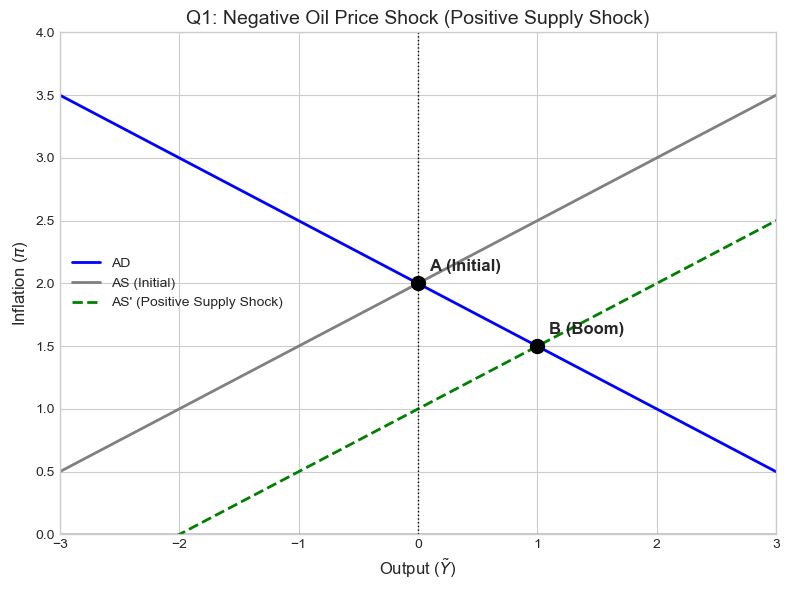

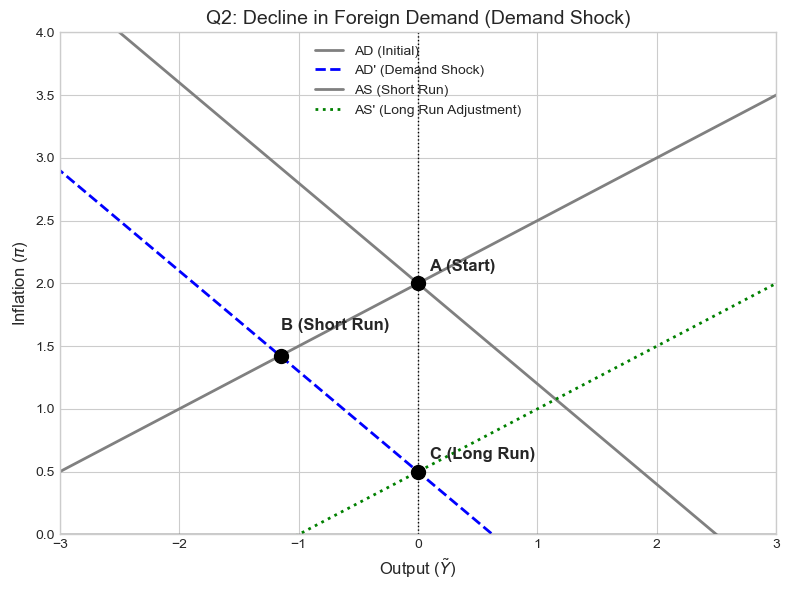

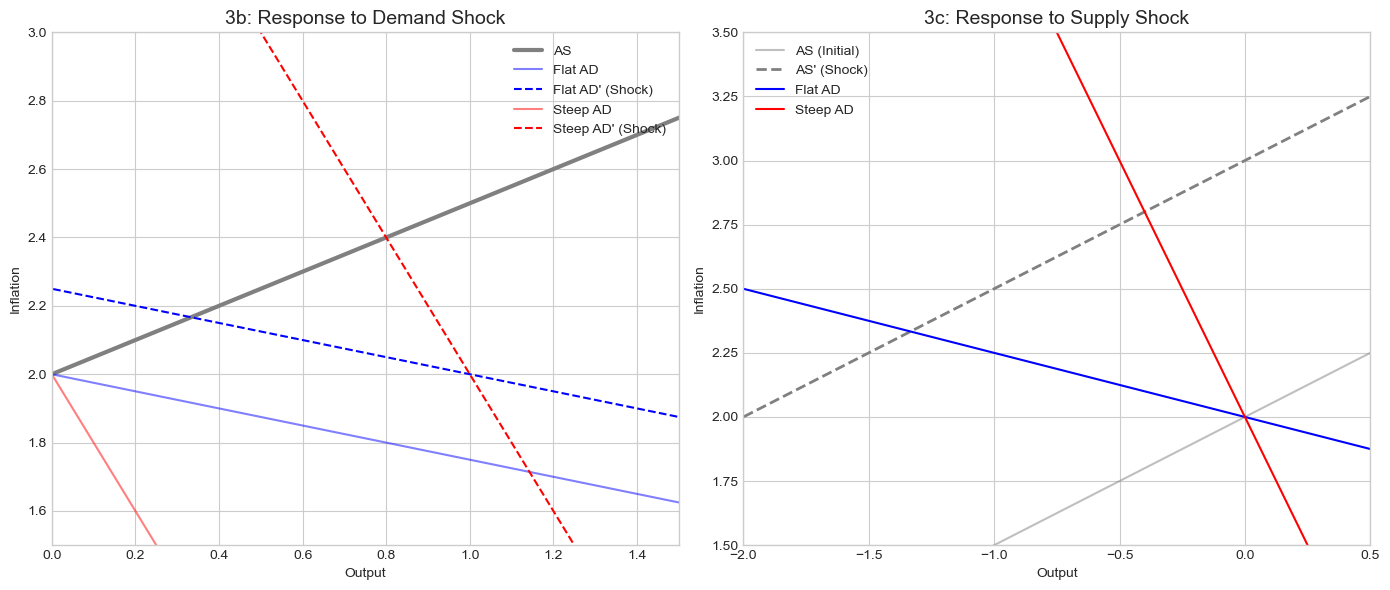

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the style for clean, professional graphs
plt.style.use('seaborn-v0_8-whitegrid')

# Define the range for Output (Y)
Y = np.linspace(-4, 4, 100)

def plot_q1_oil_shock():
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Define Curves
    # AD: Inflation = 2 - 0.5 * Y (Downward sloping)
    AD = 2 - 0.5 * Y
    
    # AS Initial: Inflation = 2 + 0.5 * Y (Upward sloping)
    AS_initial = 2 + 0.5 * Y
    
    # AS Shock (Negative Oil Price = Positive Supply Shock)
    # Shifts Down/Right (e.g., intercept moves from 2 to 1)
    AS_shock = 1 + 0.5 * Y
    
    # Plotting
    ax.plot(Y, AD, label='AD', color='blue', linewidth=2)
    ax.plot(Y, AS_initial, label='AS (Initial)', color='grey', linewidth=2)
    ax.plot(Y, AS_shock, label="AS' (Positive Supply Shock)", color='green', linestyle='--', linewidth=2)
    
    # Annotations for Equilibrium Points
    # Point A: Intersection of AD and AS_initial (Y=0, Pi=2)
    ax.scatter(0, 2, color='black', s=100, zorder=5)
    ax.text(0.1, 2.1, 'A (Initial)', fontsize=12, fontweight='bold')
    
    # Point B: Intersection of AD and AS_shock
    # 2 - 0.5Y = 1 + 0.5Y => 1 = Y => Pi = 1.5
    ax.scatter(1, 1.5, color='black', s=100, zorder=5)
    ax.text(1.1, 1.6, 'B (Boom)', fontsize=12, fontweight='bold')
    
    # Formatting
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1, linestyle=':')
    ax.set_xlabel('Output ($\~{Y}$)', fontsize=12)
    ax.set_ylabel('Inflation ($\pi$)', fontsize=12)
    ax.set_title('Q1: Negative Oil Price Shock (Positive Supply Shock)', fontsize=14)
    ax.legend()
    ax.set_xlim(-3, 3)
    ax.set_ylim(0, 4)
    plt.tight_layout()
    plt.show()

def plot_q2_demand_shock():
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Define Curves
    # Initial AD: Pi = 2 - 0.8 * Y
    AD_initial = 2 - 0.8 * Y
    
    # Shocked AD (Demand Drops): Shift Left/Down
    AD_shock = 0.5 - 0.8 * Y
    
    # Initial AS (Short Run): Pi = 2 + 0.5 * Y
    AS_sr = 2 + 0.5 * Y
    
    # Long Run AS: Shifts down to restore Y=0 at new AD intersection
    # New Long Run Equilibrium must be at Y=0.
    # At Y=0, AD_shock gives Pi = 0.5. So AS needs to pass through (0, 0.5)
    AS_lr = 0.5 + 0.5 * Y
    
    # Plotting
    ax.plot(Y, AD_initial, color='grey', linewidth=2, label='AD (Initial)')
    ax.plot(Y, AD_shock, color='blue', linestyle='--', linewidth=2, label="AD' (Demand Shock)")
    ax.plot(Y, AS_sr, color='grey', linewidth=2, label='AS (Short Run)')
    ax.plot(Y, AS_lr, color='green', linestyle=':', linewidth=2, label="AS' (Long Run Adjustment)")
    
    # Annotations
    # Point A (Start)
    ax.scatter(0, 2, color='black', s=100, zorder=5)
    ax.text(0.1, 2.1, 'A (Start)', fontsize=12, fontweight='bold')
    
    # Point B (Short Run Recession)
    # Intersection of AD_shock and AS_sr
    # 0.5 - 0.8Y = 2 + 0.5Y => -1.5 = 1.3Y => Y approx -1.15
    y_b = -1.15
    pi_b = 2 + 0.5 * y_b
    ax.scatter(y_b, pi_b, color='black', s=100, zorder=5)
    ax.text(y_b, pi_b + 0.2, 'B (Short Run)', fontsize=12, fontweight='bold')
    
    # Point C (Long Run)
    ax.scatter(0, 0.5, color='black', s=100, zorder=5)
    ax.text(0.1, 0.6, 'C (Long Run)', fontsize=12, fontweight='bold')
    
    # Formatting
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1, linestyle=':')
    ax.set_xlabel('Output ($\~{Y}$)', fontsize=12)
    ax.set_ylabel('Inflation ($\pi$)', fontsize=12)
    ax.set_title('Q2: Decline in Foreign Demand (Demand Shock)', fontsize=14)
    ax.legend()
    ax.set_xlim(-3, 3)
    ax.set_ylim(0, 4)
    plt.tight_layout()
    plt.show()

def plot_q3_slopes():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Shared AS Curve
    AS = 2 + 0.5 * Y
    
    # --- Panel 1: Demand Shock Response ---
    # Flat AD (High Sensitivity)
    AD_flat_1 = 2 - 0.25 * Y
    AD_flat_2 = 2.25 - 0.25 * Y # Shocked
    
    # Steep AD (Low Sensitivity)
    AD_steep_1 = 2 - 2 * Y
    AD_steep_2 = 4 - 2 * Y # Shocked
    
    ax1.plot(Y, AS, color='grey', linewidth=3, label='AS')
    ax1.plot(Y, AD_flat_1, color='blue', alpha=0.5, label='Flat AD')
    ax1.plot(Y, AD_flat_2, color='blue', linestyle='--', label="Flat AD' (Shock)")
    ax1.plot(Y, AD_steep_1, color='red', alpha=0.5, label='Steep AD')
    ax1.plot(Y, AD_steep_2, color='red', linestyle='--', label="Steep AD' (Shock)")
    
    # Intersection Points Logic
    # Flat: Y increases slightly. Steep: Y increases a lot.
    ax1.set_title('3b: Response to Demand Shock', fontsize=14)
    ax1.set_xlabel('Output')
    ax1.set_ylabel('Inflation')
    ax1.set_xlim(0, 1.5)
    ax1.set_ylim(1.5, 3)
    ax1.legend(loc='upper right')
    
    # --- Panel 2: Supply Shock Response ---
    # Shift AS Up
    AS_shock = 3 + 0.5 * Y
    
    ax2.plot(Y, AS, color='grey', alpha=0.5, label='AS (Initial)')
    ax2.plot(Y, AS_shock, color='grey', linestyle='--', linewidth=2, label="AS' (Shock)")
    ax2.plot(Y, AD_flat_1, color='blue', label='Flat AD')
    ax2.plot(Y, AD_steep_1, color='red', label='Steep AD')
    
    ax2.set_title('3c: Response to Supply Shock', fontsize=14)
    ax2.set_xlabel('Output')
    ax2.set_ylabel('Inflation')
    ax2.set_xlim(-2, 0.5)
    ax2.set_ylim(1.5, 3.5)
    ax2.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Run the functions to generate graphs
if __name__ == "__main__":
    plot_q1_oil_shock()
    plot_q2_demand_shock()
    plot_q3_slopes()